# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\fa14m\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fa14m\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fa14m\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fa14m\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, models,layers
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13516s 79us/step


In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

In [27]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [29]:
y_train[:5] # it is two D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
y_train=y_train.reshape(-1)

In [33]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

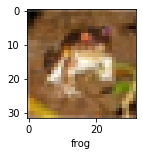

In [35]:
plot_sample(X_train, y_train, 0)

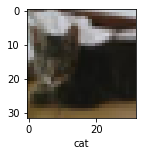

In [36]:
plot_sample(X_train, y_train, 9)

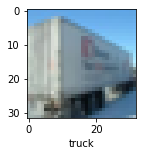

In [37]:
plot_sample(X_train, y_train, 15)

In [89]:
X_train=X_train/255.0
X_test=X_test/255.0

In [97]:
X_train.shape[-3:]

(32, 32, 3)

In [99]:
ann=models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[-3:])),
    layers.Dense(1000, activation='relu'), 
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [101]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [102]:
ann.fit(X_train, y_train, epochs=4)

Epoch 1/4
50000/50000 [==============================] - 56s 1ms/sample - loss: 2.3026 - acc: 0.0965
Epoch 2/4
50000/50000 [==============================] - 55s 1ms/sample - loss: 2.3026 - acc: 0.0964
Epoch 3/4
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.3026 - acc: 0.0958
Epoch 4/4
50000/50000 [==============================] - 56s 1ms/sample - loss: 2.3026 - acc: 0.0984


In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.42      0.50      1000
           1       0.71      0.48      0.57      1000
           2       0.33      0.33      0.33      1000
           3       0.29      0.44      0.35      1000
           4       0.40      0.37      0.39      1000
           5       0.50      0.15      0.23      1000
           6       0.32      0.81      0.46      1000
           7       0.75      0.26      0.39      1000
           8       0.53      0.68      0.60      1000
           9       0.61      0.46      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



# Convoluton Neural network model

In [52]:
cnn=models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(),
    layers.Dense(100, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [57]:
#compile the model
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# training the model
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 32s 630us/sample - loss: 1.4433 - acc: 0.4838
Epoch 2/5
50000/50000 [==============================] - 34s 685us/sample - loss: 1.0937 - acc: 0.6163
Epoch 3/5
50000/50000 [==============================] - 31s 616us/sample - loss: 0.9621 - acc: 0.6662
Epoch 4/5
50000/50000 [==============================] - 30s 594us/sample - loss: 0.8658 - acc: 0.6983
Epoch 5/5
50000/50000 [==============================] - 29s 589us/sample - loss: 0.7913 - acc: 0.7226


In [61]:
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 200us/sample - loss: 0.9266 - acc: 0.6791


[0.926648452758789, 0.6791]

In [62]:
prediction=cnn.predict(X_test)

In [64]:
prediction=prediction.argmax(axis=1)

In [65]:
prediction

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [66]:
prediction[1]

8

In [68]:
y_classes = [element for element in prediction]
y_classes[:5]

[3, 8, 8, 0, 4]

In [70]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6])

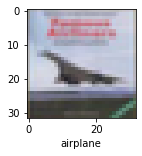

In [73]:
plot_sample(X_test, y_test,3)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
# confusion matrix
cm=confusion_matrix(prediction, y_test)
print('confusion matrix:')
print(cm)

confusion matrix:
[[562   8  39  15   8  13   3  11  22   9]
 [ 19 801  11   9   4   3   2   3  23  97]
 [ 53   3 483  31  45  37  21  28   9   9]
 [ 57  19 110 603 124 243  75 100  24  35]
 [ 20   6 101  66 616  45  21  59   7   6]
 [  7   6  81 132  39 567  12  68   6   8]
 [ 18  17 110  85  96  45 847  14   5  12]
 [  4   1  24  16  44  26   3 687   1  12]
 [230  63  30  28  18  15  12  15 883  70]
 [ 30  76  11  15   6   6   4  15  20 742]]


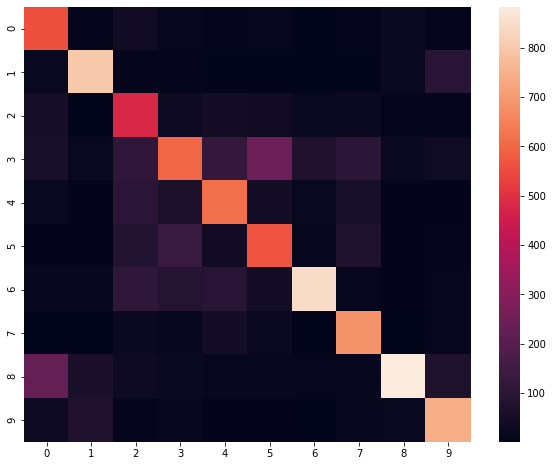

In [87]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm)

In [78]:
clr=classification_report(prediction, y_test)
print("Classification Report for CiFar10 dataset:")
print(clr)

Classification Report for CiFar10 dataset:
              precision    recall  f1-score   support

           0       0.56      0.81      0.67       690
           1       0.80      0.82      0.81       972
           2       0.48      0.67      0.56       719
           3       0.60      0.43      0.50      1390
           4       0.62      0.65      0.63       947
           5       0.57      0.61      0.59       926
           6       0.85      0.68      0.75      1249
           7       0.69      0.84      0.76       818
           8       0.88      0.65      0.75      1364
           9       0.74      0.80      0.77       925

    accuracy                           0.68     10000
   macro avg       0.68      0.70      0.68     10000
weighted avg       0.70      0.68      0.68     10000

